## Prelimiary Steps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### I wanted to find something that the students could easily relate to without being too overwhelming. I have attached a file with about 33K records from an online book seller. All of the F* variables are count, e.g., Fclassic3 is the number of classics books the customer has bought in the past. The M* variables are monetary, so Mclassic3 is the amount spent on classics in the past. There is also recency (r), overall frequency (F), overall monetary (m) and time on file in days (tof).

In [ ]:
# read the dataset
# In order for this to work for you, you must create a shortcut for the
# Leadership & Consulting folder on your personal drive.
clean_df = pd.read_excel("/content/drive/My Drive/Leadership & Consulting/data/Ecommerce_data.xlsx")

In [ ]:
clean_df.dtypes.to_dict()

{'id': dtype('int64'),
 'logtarg': dtype('float64'),
 'r': dtype('int64'),
 'f': dtype('int64'),
 'm': dtype('float64'),
 'tof': dtype('int64'),
 'Ffiction1': dtype('int64'),
 'Fclassics3': dtype('int64'),
 'Fcartoons5': dtype('int64'),
 'Flegends6': dtype('int64'),
 'Fphilosophy7': dtype('int64'),
 'Freligion8': dtype('int64'),
 'Fpsychology9': dtype('int64'),
 'Flinguistics10': dtype('int64'),
 'Fart12': dtype('int64'),
 'Fmusic14': dtype('int64'),
 'Ffacsimile17': dtype('int64'),
 'Fhistory19': dtype('int64'),
 'Fconthist20': dtype('int64'),
 'Feconomy21': dtype('int64'),
 'Fpolitics22': dtype('int64'),
 'Fscience23': dtype('int64'),
 'Fcompsci26': dtype('int64'),
 'Frailroads27': dtype('int64'),
 'Fmaps30': dtype('int64'),
 'Ftravelguides31': dtype('int64'),
 'Fhealth35': dtype('int64'),
 'Fcooking36': dtype('int64'),
 'Flearning37': dtype('int64'),
 'FGamesRiddles38': dtype('int64'),
 'Fsports39': dtype('int64'),
 'Fhobby40': dtype('int64'),
 'Fnature41': dtype('int64'),
 'Fencycl

In [ ]:
clean_df.shape

(33713, 69)

In [ ]:
clean_df.head(5)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,I wanted to find something that the students c...
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,"I have data from American Science and Surplus,..."
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,NaN


In [ ]:
# only 326 of the rows are non-empty & non-zero, compared to 33713 rows. Thus this column should be dropped
clean_df[(clean_df['logtarg'].notna()) & (clean_df['logtarg'] != 0)].shape

(326, 69)

In [ ]:
clean_df[clean_df['Unnamed: 66'].notna()].shape

(0, 69)

In [ ]:
clean_df[clean_df['Unnamed: 67'].notna()].shape

(0, 69)

In [ ]:
clean_df = clean_df.drop(columns=['logtarg', 'Dear Greg,', 'Unnamed: 66', 'Unnamed: 67', 'id'])

In [ ]:
clean_df.shape

(33713, 64)

In [ ]:
clean_df.columns

Index(['r', 'f', 'm', 'tof', 'Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99', 'Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'],
      dtype='obj

In [ ]:
clean_df.dropna().head(5)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,194,7,318.894775,1703,1,0,1,0,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,3,14,368.052246,2364,1,0,2,0,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1489,15,423.298340,2371,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,155,4,71.217041,1290,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,194,6,442.638184,2188,0,0,1,0,3,1,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


## Real EDA Steps

In [ ]:
df = clean_df.copy()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r,33713.0,508.427254,542.440039,0.0,117.000000,293.000000,712.000000,2460.000000
f,33713.0,5.820603,7.008049,0.0,1.000000,3.000000,7.000000,118.000000
m,33713.0,251.924325,3929.929826,0.0,39.899994,102.629944,247.297485,532892.000000
tof,33713.0,1296.088186,818.976321,0.0,536.000000,1311.000000,2132.000000,2462.000000
Ffiction1,33713.0,0.590900,1.762201,0.0,0.000000,0.000000,1.000000,109.000000
...,...,...,...,...,...,...,...,...
Mhobby40,33713.0,6.785558,21.197488,0.0,0.000000,0.000000,5.112919,771.610840
Mnature41,33713.0,3.728635,15.007592,0.0,0.000000,0.000000,0.000000,735.354980
Mencyclopaedia44,33713.0,8.402428,46.021881,0.0,0.000000,0.000000,0.000000,1999.150391
Mvideos50,33713.0,6.020431,19.643978,0.0,0.000000,0.000000,0.000000,794.137695


In [ ]:
# fig = plt.figure(figsize = (15, 10));
# ax = fig.gca();
# df.hist(ax = ax, color = 'maroon')
# pass

In [ ]:
selected_columns_F = df.loc[:, df.columns.str.startswith('F')]
selected_columns_F.head(5)

,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,...,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99
0,1,0,1,0,0,0,0,0,1,7,...,2,1,0,0,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,4,...,7,0,4,0,0,4,2,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,3,1,0,1,1,3,...,3,0,2,0,0,2,0,0,3,0


In [ ]:
selected_columns_M = df.loc[:, df.columns.str.startswith('M')]
selected_columns_M.head(5)

,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [ ]:
# Extract columns for Money (M) and Frequency (F)
money_columns = [col for col in df.columns if col.startswith('M')]
frequency_columns = [col for col in df.columns if col.startswith('F')]

# Ensure the columns are in the same order for matching categories
money_columns.sort()
frequency_columns.sort()

# Calculate average spend per category, adding that back to the original df
average_spend = {}
for m_col, f_col in zip(money_columns, frequency_columns):
    category = m_col[1:]
    df[f'AvgSpend_{category}'] = np.where(df[f_col] == 0, 0, round(df[m_col] / df[f_col], 2))

    average_spend[category] = (df[m_col] / df[f_col]).median()

# Convert result to a DataFrame
average_spend_df = pd.DataFrame(list(average_spend.items()), columns=['Category', 'Median_Average_Spend'])
print("\nMedian Average Spend per Category:")
print(average_spend_df.sort_values('Median_Average_Spend', ascending=False))


Median Average Spend per Category:
           Category  Median_Average_Spend
9       facsimile17             34.767822
1             art12             15.236496
17           maps30             14.034958
29         videos50             13.937132
27         sports39             12.782295
12        history19             11.951053
5        conthist20             10.200272
3         classics3             10.200272
24      railroads27             10.200272
22       politics22             10.000000
0    GamesRiddles38              9.949997
19         nature41              9.949738
26        science23              9.899994
16    linguistics10              9.724998
25        religion8              9.573070
23      psychology9              9.203247
8   encyclopaedia44              9.139336
7         economy21              9.049861
13          hobby40              8.975002
28   travelguides31              8.949997
21      philosophy7              8.840019
15         legends6              8.58969

In [ ]:
df.head(5)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,AvgSpend_nonbooks99,AvgSpend_philosophy7,AvgSpend_politics22,AvgSpend_psychology9,AvgSpend_railroads27,AvgSpend_religion8,AvgSpend_science23,AvgSpend_sports39,AvgSpend_travelguides31,AvgSpend_videos50
0,194,7,318.894775,1703,1,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,6.14,0.0
1,3,14,368.052246,2364,1,0,2,0,0,0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
2,1489,15,423.298340,2371,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,155,4,71.217041,1290,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
4,194,6,442.638184,2188,0,0,1,0,3,1,...,0.0,8.73,0.0,0.0,4.98,19.9,9.92,0.0,10.12,20.6


In [ ]:
avg_cols = [col for col in df.columns if col.startswith('AvgSpend')]
df['Max_AvgSpend_Category'] = df[avg_cols].idxmax(axis=1)

In [ ]:
df.head(5)

,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,AvgSpend_philosophy7,AvgSpend_politics22,AvgSpend_psychology9,AvgSpend_railroads27,AvgSpend_religion8,AvgSpend_science23,AvgSpend_sports39,AvgSpend_travelguides31,AvgSpend_videos50,Max_AvgSpend_Category
0,194,7,318.894775,1703,1,0,1,0,0,0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,6.14,0.0,AvgSpend_conthist20
1,3,14,368.052246,2364,1,0,2,0,0,0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,AvgSpend_hobby40
2,1489,15,423.298340,2371,0,0,0,0,0,0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,AvgSpend_conthist20
3,155,4,71.217041,1290,0,0,0,0,0,0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,AvgSpend_conthist20
4,194,6,442.638184,2188,0,0,1,0,3,1,...,8.73,0.0,0.0,4.98,19.9,9.92,0.0,10.12,20.6,AvgSpend_videos50


In [ ]:
category_counts = df['Max_AvgSpend_Category'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

In [ ]:
category_counts

,count
Max_AvgSpend_Category,
AvgSpend_history19,5014
AvgSpend_conthist20,3106
AvgSpend_art12,2893
AvgSpend_videos50,2756
AvgSpend_music14,2299
AvgSpend_health35,1935
AvgSpend_encyclopaedia44,1841
AvgSpend_religion8,1423
AvgSpend_travelguides31,1275


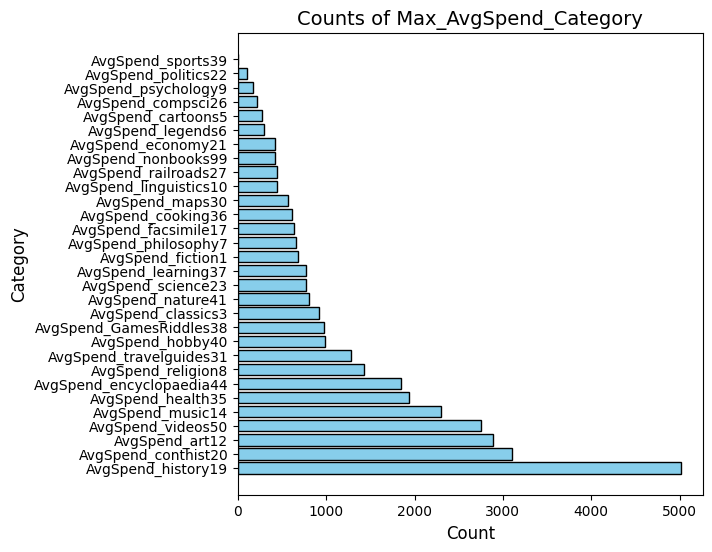

In [ ]:
plt.figure(figsize=(6, 6))
bars = plt.barh(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

# for bar in bars:
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3,
#              f'{int(bar.get_height())}', ha='center', fontsize=10)

plt.title('Counts of Max_AvgSpend_Category', fontsize=14)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=12)

plt.show()

## Conclusion

The category with the most median average spend, may not be the one labeled for `Max_AvgSpend_Category`, since the one categorized to `Max_AvgSpend_Category` is based on the max average spending of each customer.

## Preliminary RFM Model

In [32]:
selected_cols = ['r', 'f', 'm']
rfm = df[selected_cols]

In [33]:
#Define quartiles for RFM score:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

rfm['R'] = rfm['r'].apply(RFMScore, args=('r',quantiles,))
rfm['F'] = rfm['f'].apply(RFMScore, args=('f',quantiles,))
rfm['M'] = rfm['m'].apply(RFMScore, args=('m',quantiles,))
# Concat RFM quartile values to create RFM Segments
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [ ]:
rfm

,r,f,m,R,F,M,RFM_Segment,RFM_Score
0,194,7,318.894775,2,3,4,234,9
1,3,14,368.052246,1,4,4,144,9
2,1489,15,423.298340,4,4,4,444,12
3,155,4,71.217041,2,3,2,232,7
4,194,6,442.638184,2,3,4,234,9
...,...,...,...,...,...,...,...,...
33708,6,1,0.000000,1,1,1,111,3
33709,4,1,0.000000,1,1,1,111,3
33710,5,1,22.949997,1,1,1,111,3
33711,0,0,0.000000,1,1,1,111,3


#### I would upload pictures for this part to google drive, under Pictures folder

![RFM Rating](./Picture/RFM.webp)

In [ ]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}

# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze'
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver'
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold'
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'

In [ ]:
rfm

,r,f,m,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,194,7,318.894775,2,3,4,234,9,At risk,Silver
1,3,14,368.052246,1,4,4,144,9,At risk,Silver
2,1489,15,423.298340,4,4,4,444,12,Loyal customers,Platinum
3,155,4,71.217041,2,3,2,232,7,At risk,Bronze
4,194,6,442.638184,2,3,4,234,9,At risk,Silver
...,...,...,...,...,...,...,...,...,...,...
33708,6,1,0.000000,1,1,1,111,3,Hibernating,Green
33709,4,1,0.000000,1,1,1,111,3,Hibernating,Green
33710,5,1,22.949997,1,1,1,111,3,Hibernating,Green
33711,0,0,0.000000,1,1,1,111,3,Hibernating,Green


#### I would upload pictures for this part to google drive, under Pictures folder

![RFM Understand Your Customer](./Picture/Interpret_Your_Result.webp)

In [ ]:
group_selected_cols = ['r', 'f', 'm', 'tof', 'Max_AvgSpend_Category']
new_rfm = df[group_selected_cols]

In [ ]:
rfm_by_category = new_rfm.groupby('Max_AvgSpend_Category').agg({
    'r': 'mean',  # Average Recency
    'f': 'mean',  # Average Frequency
    'm': 'mean',  # Average Monetary
    'tof': 'mean'  # Average Time on File
}).reset_index()

In [ ]:
rfm_by_category

,Max_AvgSpend_Category,r,f,m,tof
0,AvgSpend_GamesRiddles38,373.017382,1.180982,17.590634,439.783231
1,AvgSpend_art12,508.300035,7.975458,299.414440,1556.054269
2,AvgSpend_cartoons5,592.545455,4.465455,132.900385,1265.589091
3,AvgSpend_classics3,555.388222,8.183206,336.365468,1632.637950
4,AvgSpend_compsci26,642.380282,7.774648,269.211877,1708.892019
5,AvgSpend_conthist20,454.690599,4.475531,128.257492,1074.338055
6,AvgSpend_cooking36,820.700491,5.486088,196.095685,1642.171849
7,AvgSpend_economy21,648.781250,5.213942,151.590573,1399.875000
8,AvgSpend_encyclopaedia44,509.985877,6.447040,307.039313,1403.305269
9,AvgSpend_facsimile17,502.931034,12.037618,717.564486,1845.059561


In [ ]:
rfm_by_category['R'] = rfm_by_category['r'].apply(RFMScore, args=('r',quantiles,))
rfm_by_category['F'] = rfm_by_category['f'].apply(RFMScore, args=('f',quantiles,))
rfm_by_category['M'] = rfm_by_category['m'].apply(RFMScore, args=('m',quantiles,))

rfm_by_category['RFM_Segment'] = rfm_by_category.apply(join_rfm, axis=1)
# Calculate RFM_Score
rfm_by_category['RFM_Score'] = rfm_by_category[['R','F','M']].sum(axis=1)

In [ ]:
rfm_by_category

,Max_AvgSpend_Category,r,f,m,tof,R,F,M,RFM_Segment,RFM_Score
0,AvgSpend_GamesRiddles38,373.017382,1.180982,17.590634,439.783231,3,2,1,321,6
1,AvgSpend_art12,508.300035,7.975458,299.414440,1556.054269,3,4,4,344,11
2,AvgSpend_cartoons5,592.545455,4.465455,132.900385,1265.589091,3,3,3,333,9
3,AvgSpend_classics3,555.388222,8.183206,336.365468,1632.637950,3,4,4,344,11
4,AvgSpend_compsci26,642.380282,7.774648,269.211877,1708.892019,3,4,4,344,11
5,AvgSpend_conthist20,454.690599,4.475531,128.257492,1074.338055,3,3,3,333,9
6,AvgSpend_cooking36,820.700491,5.486088,196.095685,1642.171849,4,3,3,433,10
7,AvgSpend_economy21,648.781250,5.213942,151.590573,1399.875000,3,3,3,333,9
8,AvgSpend_encyclopaedia44,509.985877,6.447040,307.039313,1403.305269,3,3,4,334,10
9,AvgSpend_facsimile17,502.931034,12.037618,717.564486,1845.059561,3,4,4,344,11


1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done
27 is done
28 is done
29 is done
30 is done


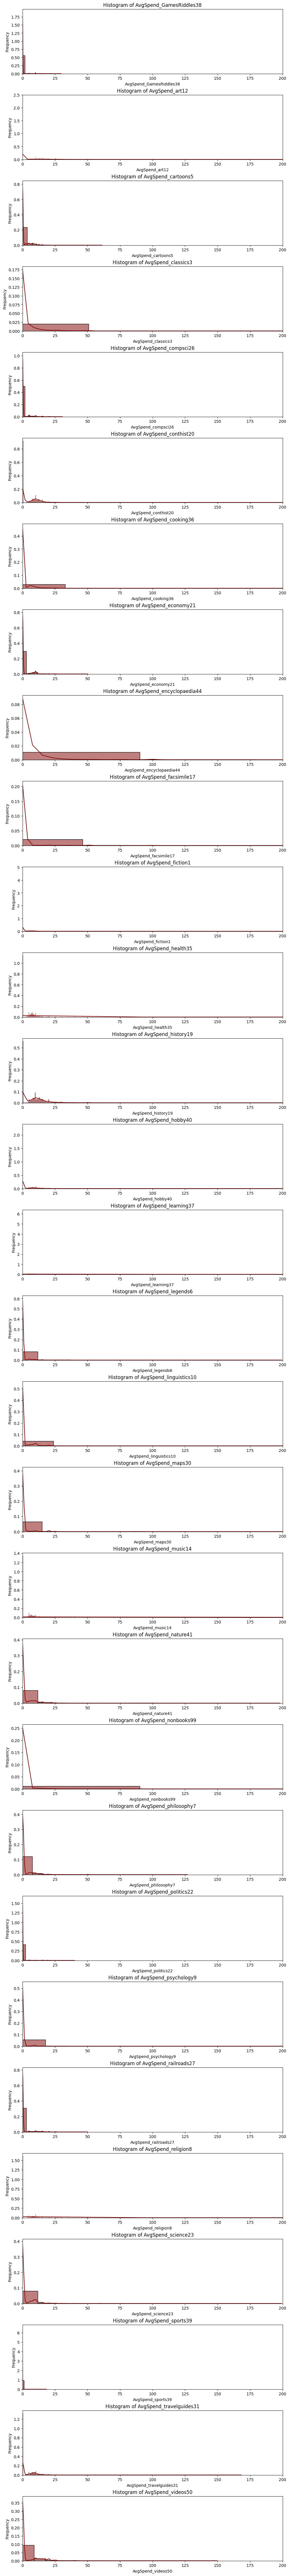

'Completed'

In [ ]:
avg_cols = [col for col in df.columns if col.startswith('AvgSpend')]
x_limits = (0, 200)
# y_limits = (0, 35000)

def avg_histplot(avg_cols, x_limits):
    fig, axes = plt.subplots(
        nrows=len(avg_cols),
        ncols=1,
        figsize=(10, len(avg_cols) * 3),
        constrained_layout=True
    )

    i = 1

    for ax, col in zip(axes, avg_cols):
        sns.histplot(data=df, x=col, kde=True, color='maroon', ax=ax, stat='density')
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_xlim(x_limits)
        # ax.set_ylim(y_limits)

        print("{0} is done".format(i))
        i = i + 1

    plt.show()

    return "Completed"

avg_histplot(avg_cols, x_limits)

Index(['Gamesriddles', 'Art', 'Cartoons', 'Classics', 'Compsci', 'Conthist',
       'Cooking', 'Economy', 'Encyclopaedia', 'Facsimile', 'Fiction', 'Health',
       'History', 'Hobby', 'Learning', 'Legends', 'Linguistics', 'Maps',
       'Music', 'Nature', 'Nonbooks', 'Philosophy', 'Politics', 'Psychology',
       'Railroads', 'Religion', 'Science', 'Sports', 'Travelguides', 'Videos'],
      dtype='object')


Text(0.5, 1.0, 'Genre Correlation by Money Spent')

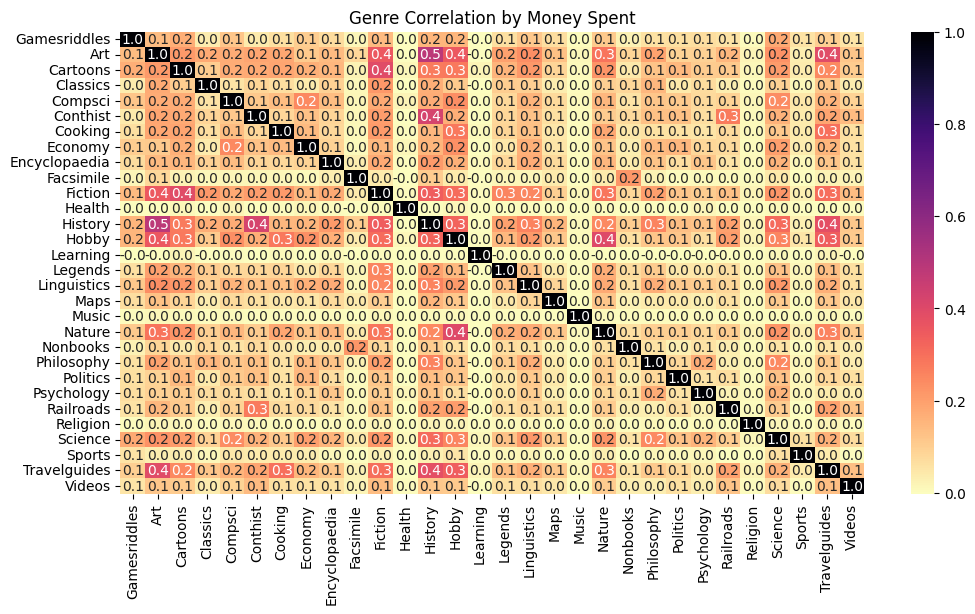

In [99]:
# Compute correlation values of categories by number of books bought and money spent
# Which genres are frequently bought together?

# Helper function to extract the genre name from a column
# E.g. 'Mart1' -> 'Art'
def clean_genre_name(name: str):
  trans_table = str.maketrans('', '', 'MF0123456789')
  return str.capitalize(name.translate(trans_table))


money_cols = df[money_columns].rename(columns=lambda c: clean_genre_name(c))
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(money_cols.corr(), annot = True, fmt = '.1f', cmap = 'magma_r')
ax.set_title('Genre Correlation by Money Spent')

Text(0.5, 1.0, 'Genre Correlation by Number of Books Bought')

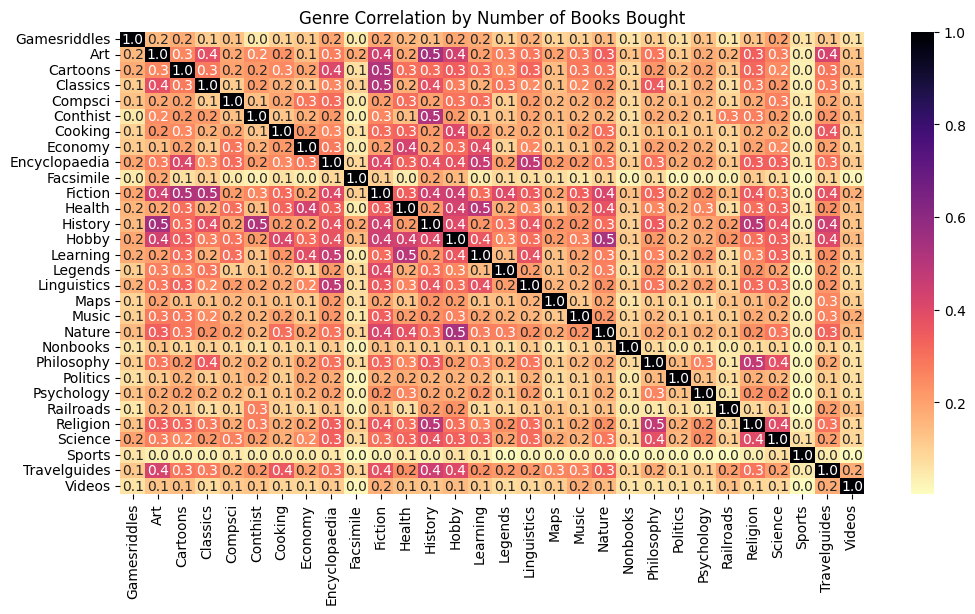

In [100]:
freq_cols = df[frequency_columns].rename(columns=lambda c: clean_genre_name(c))

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(freq_cols.corr(), annot = True, fmt = '.1f', cmap = 'magma_r')
ax.set_title('Genre Correlation by Number of Books Bought')

The most correlated (i.e. frequently bought together) genres are art and history, nature and hobby, art and travel guides, art and hobby, and cartoons and fictoin. Facsimile and sports are not very correlated with any other genres.

I think that computing correlation by number of books bought is more insightful since it removes the bias that some genres tend to be more expensive. Question: can one book be considered multiple genres (e.g. a birdwatching ?

Text(0.5, 1.0, 'Total Number of Sales by Genre')

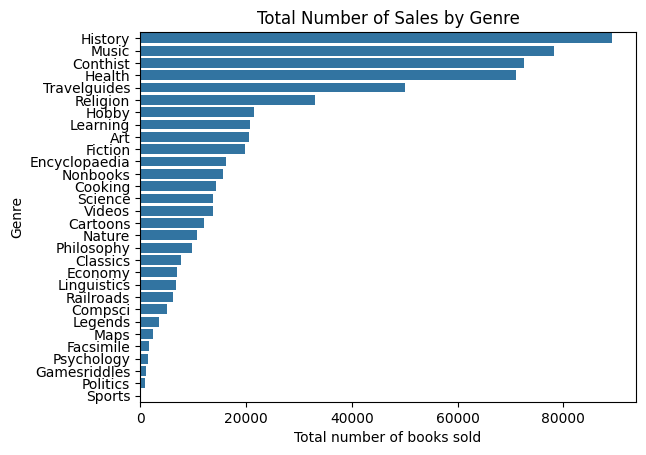

In [124]:
# Which genres are bought the most?

freq_totals = freq_cols.sum().sort_values(ascending=False).reset_index()
freq_totals.columns = ['Genre', 'Total number of books sold']
sns.barplot(freq_totals, x='Total number of books sold', y='Genre', orient='h')
plt.title('Total Number of Sales by Genre')

Text(0.5, 1.0, 'Total Revenue by Genre')

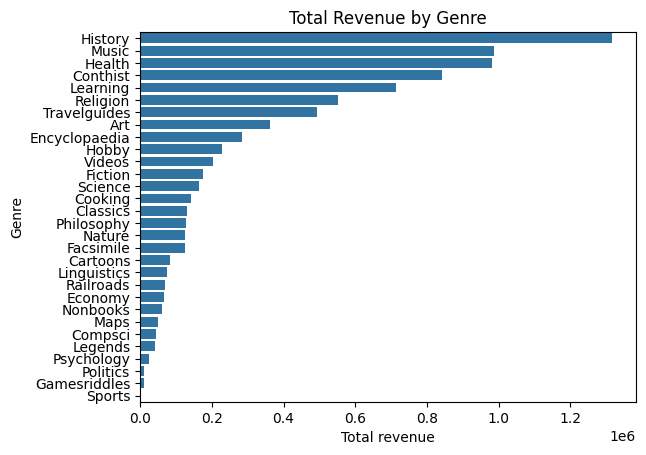

In [123]:
money_totals = money_cols.sum().sort_values(ascending=False).reset_index()
money_totals.columns = ['Genre', 'Total revenue']
sns.barplot(money_totals, y='Genre', x='Total revenue', orient='h')
plt.title('Total Revenue by Genre')

Text(0.5, 1.0, 'Average Book Price by Genre')

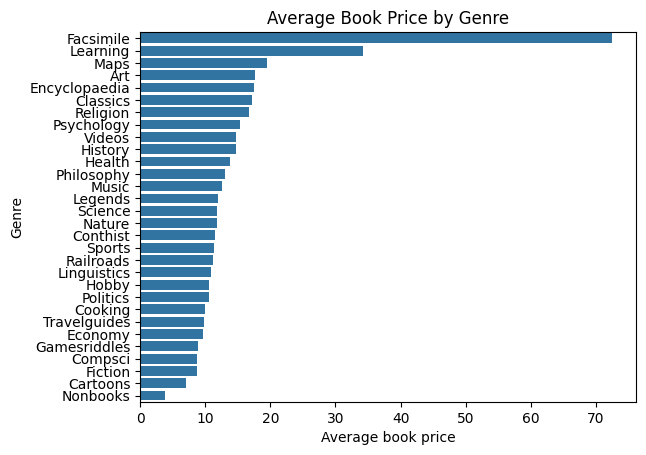

In [134]:
genre_avgs = money_totals.merge(freq_totals, on='Genre', how='inner')
genre_avgs['Average book price'] = genre_avgs['Total revenue'] / genre_avgs['Total number of books sold']
sns.barplot(genre_avgs.sort_values('Average book price', ascending=False), y='Genre', x='Average book price', orient='h')
plt.title('Average Book Price by Genre')

Genres with more books sold tend to bring in more revenue. The most popular genres are history, music, conthist, health, travel guides, religion, hobby, and learning. Facsimilie books (reproductions of old books and manuscripts) are the most expensive by far, with learning books also being significantly more expensive than the rest of the genres, likely due to textbooks being classified as learning.

In [149]:
# Verify relationship between m and money columns
print(np.all(abs(df['m'] - df[money_columns].sum(axis=1)) < 0.01))

# There are 4 customers with total money spent above $15,000.
# All 4 of them have spent more than $140,000.

df.sort_values('m', ascending=False).head(10)

True


,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,AvgSpend_philosophy7,AvgSpend_politics22,AvgSpend_psychology9,AvgSpend_railroads27,AvgSpend_religion8,AvgSpend_science23,AvgSpend_sports39,AvgSpend_travelguides31,AvgSpend_videos50,Max_AvgSpend_Category
9044,69,11,532891.849770,2287,2,0,4,0,0,4,...,0.00,0.00,0.00,0.00,6.89,39.88,0.0,11.49,0.00,AvgSpend_learning37
8172,191,18,383349.431133,2364,1,0,1,0,0,0,...,0.00,0.00,19.43,0.00,0.00,8.95,0.0,0.00,12.68,AvgSpend_health35
22192,90,3,252743.074982,258,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,13.27,0.00,AvgSpend_music14
13833,23,31,147684.817171,1438,3,0,0,0,0,8,...,0.00,0.00,3.95,0.00,18269.34,9.90,0.0,10.48,12.80,AvgSpend_religion8
21167,16,118,18582.525589,648,109,20,18,22,28,51,...,9.58,6.39,8.85,11.62,16.16,14.80,0.0,13.86,15.55,AvgSpend_facsimile17
27990,563,22,10680.717873,2456,0,0,0,0,0,3,...,0.00,0.00,0.00,0.00,35.78,40.80,0.0,0.00,0.00,AvgSpend_nonbooks99
7478,25,38,10073.935463,2027,5,1,15,0,0,18,...,0.00,37.80,43.51,18.23,55.51,27.53,0.0,11.50,12.80,AvgSpend_maps30
3512,559,14,9719.807793,2307,0,0,0,0,0,2,...,0.00,0.00,0.00,0.00,29.26,0.00,0.0,0.00,0.00,AvgSpend_facsimile17
2538,34,110,9446.017109,2217,63,16,49,7,29,101,...,8.50,6.54,13.20,8.26,9.86,10.52,0.0,10.01,8.56,AvgSpend_art12
2960,94,59,9256.167374,2434,11,8,4,0,2,29,...,9.27,0.00,0.00,5.01,13.81,9.18,0.0,14.65,10.90,AvgSpend_art12


In [212]:
# Verify relationship between f and frequency columns
# Number of purchases not always equal to total number of books bought
print(np.mean(df['f'] == df[frequency_columns].sum(axis=1)))
# Can't have more purchases made than books bought
print(np.mean(df['f'] <= df[frequency_columns].sum(axis=1)))
# Can have more books bought in one genre than purchases made
print(np.mean(df['f'] >= df[frequency_columns].max(axis=1)))

0.11366535164476611
1.0
0.6083113339068015


Overall frequency does not seem to equal number of books bought, but it is always less than or equal to number of books bought. It is likely number of purchases made. Some customers have a higher frequency in one genre than overall, so the genre-level frequencies likely refer to number of books bought in that genre, and the total frequency `f` refers to number of purchases made. This is because you can't have more purchases that contain a book of a given genre than total purchases, and a purchase may contain multiple books.

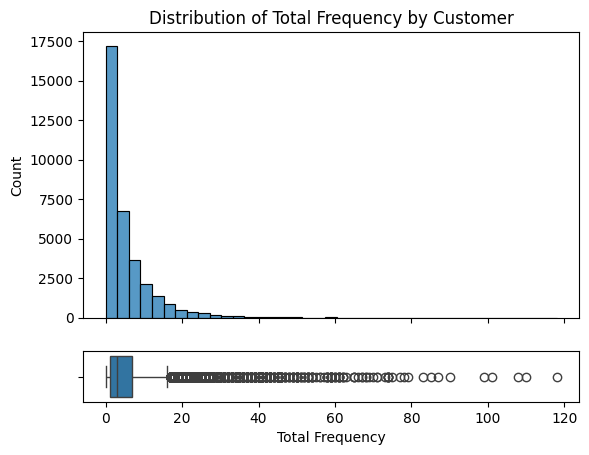

In [231]:
#df.sort_values('f', ascending=False).head(10)
# Does not seem to be serious outliers in terms of total purchases,
# Though distribution is still right-skewed.
def hist_and_box(col:str, varname:str, binwidth:float=1.0):
  fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})
  sns.histplot(df[col], ax=ax_hist, binwidth=binwidth)
  sns.boxplot(df[col], ax=ax_box, orient='h')
  ax_hist.set(xlabel="", title='Distribution of ' + varname + ' by Customer')
  ax_box.set(xlabel=varname)
  plt.show()

hist_and_box('f', 'Total Frequency', 3)

In [210]:
money_outliers = [9044, 8172, 22192, 13833]
outliers_money = df.loc[money_outliers][money_columns].rename(columns=lambda c: clean_genre_name(c)).transpose()
outliers_freq = df.loc[money_outliers][frequency_columns].rename(columns=lambda c: clean_genre_name(c)).transpose()
outliers_money.join(outliers_freq, lsuffix='_money', rsuffix='_frequency').sort_index(axis=1)

,13833_frequency,13833_money,22192_frequency,22192_money,8172_frequency,8172_money,9044_frequency,9044_money
Gamesriddles,0,0.000000,0,0.000000,0,0.000000,0,0.000000
Art,2,28.013458,0,0.000000,0,0.000000,0,0.000000
Cartoons,0,0.000000,0,0.000000,1,12.680038,4,32.601349
Classics,0,0.000000,0,0.000000,0,0.000000,0,0.000000
Compsci,1,5.010658,0,0.000000,1,15.313187,1,5.010658
Conthist,1,12.949997,0,0.000000,1,10.200272,2,30.626373
Cooking,2,16.795929,0,0.000000,1,8.666389,2,29.552658
Economy,0,0.000000,0,0.000000,2,15.073570,0,0.000000
Encyclopaedia,0,0.000000,0,0.000000,1,8.640831,7,61.287872
Facsimile,0,0.000000,0,0.000000,0,0.000000,0,0.000000


All of these outliers are the result of a lot of money spent in one genre from a few purchases. These values may be data errors; what 5 music purchases would cost $253,000? Customer 13833 has made many more purchases in other genres, but has spent nearly all their money on religion books. We may want to exclude these rows from the model training.

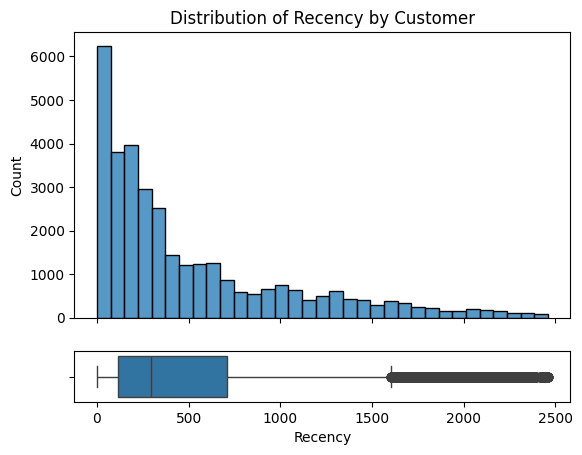

In [228]:
hist_and_box('r', 'Recency', 75)

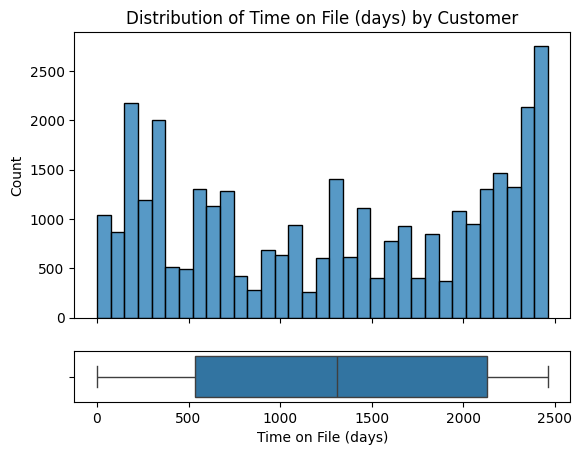

In [227]:
hist_and_box('tof', 'Time on File (days)', 75)